In [28]:
from pathlib import Path
import numpy as np
import sys
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import pandas as pd
sys.path.append('../../analyze')
sys.path.append('../../lib_processing')
import create_heatmap
import utils
import embeddings_processing

In [5]:
root_embeddings = Path('../../data/embeddings').absolute().resolve()
root_text = Path('../../data/text').absolute().resolve()
root = root_embeddings / 'w040_i020' / 'test_data_jay'

In [6]:
embed_means = np.genfromtxt(root_embeddings / '..' / 'means' / 'w040_i020' / 'test_data_jay' / 'mean.csv', delimiter='\n')

Load all data

In [7]:
embeds_sushi_description = np.genfromtxt(root / 'sushi_description.embeddings.csv', delimiter=',')
offs_sushi_description = np.genfromtxt(root / 'sushi_description.offsets.csv', delimiter=',', dtype=int)
embeds_sushi_description_norm = embeds_sushi_description - embed_means
# TODO: fix the file path thing here
#embed_norm = embeddings_processing.normalize('test_data_jay', 40, 20, embeds)
text_sushi_description = (root_text / 'test_data_jay' / 'sushi_description.txt').read_text()

In [8]:
embeds_sushi_label = np.reshape(np.genfromtxt(root / 'sushi_label.embeddings.csv', delimiter=','),(1,-1))
offs_sushi_label = np.genfromtxt(root / 'sushi_label.offsets.csv', delimiter=',', dtype=int)
embeds_sushi_label_norm = embeds_sushi_label - embed_means
# TODO: fix the file path thing here
#embed_norm = embeddings_processing.normalize('test_data_jay', 40, 20, embeds)
text_sushi_label = (root_text / 'test_data_jay' / 'sushi_label.txt').read_text()

In [9]:
embeds_random_label_1 = np.reshape(np.genfromtxt(root / 'random_label.embeddings.csv', delimiter=','),(1,-1))
offs_random_label_1 = np.genfromtxt(root / 'random_label.offsets.csv', delimiter=',', dtype=int)
embeds_random_label_1_norm = embeds_random_label_1 - embed_means
text_random_label_1 = (root_text / 'test_data_jay' / 'random_label.txt').read_text()

In [10]:
embeds_random_label_2 = np.reshape(np.genfromtxt(root / 'random_label_2.embeddings.csv', delimiter=','),(1,-1))
offs_random_label_2 = np.genfromtxt(root / 'random_label_2.offsets.csv', delimiter=',', dtype=int)
embeds_random_label_2_norm = embeds_random_label_2 - embed_means
text_random_label_2 = (root_text / 'test_data_jay' / 'random_label_2.txt').read_text()

In [11]:
embeds_random_label_3 = np.reshape(np.genfromtxt(root / 'random_label_3.embeddings.csv', delimiter=','),(1,-1))
offs_random_label_3 = np.genfromtxt(root / 'random_label_3.offsets.csv', delimiter=',', dtype=int)
embeds_random_label_3_norm = embeds_random_label_3 - embed_means
text_random_label_3 = (root_text / 'test_data_jay' / 'random_label_3.txt').read_text()

In [12]:
embeds_random_label_4 = np.reshape(np.genfromtxt(root / 'random_label_4.embeddings.csv', delimiter=','),(1,-1))
offs_random_label_4 = np.genfromtxt(root / 'random_label_4.offsets.csv', delimiter=',', dtype=int)
embeds_random_label_4_norm = embeds_random_label_4 - embed_means
text_random_label_4 = (root_text / 'test_data_jay' / 'random_label_4.txt').read_text()

In [13]:
embeds_random_label_5 = np.reshape(np.genfromtxt(root / 'random_label_5.embeddings.csv', delimiter=','),(1,-1))
offs_random_label_5 = np.genfromtxt(root / 'random_label_5.offsets.csv', delimiter=',', dtype=int)
embeds_random_label_5_norm = embeds_random_label_5 - embed_means
text_random_label_5 = (root_text / 'test_data_jay' / 'random_label_5.txt').read_text()

In [25]:
embeds_label_test = np.reshape(embeds_sushi_label,(1,-1)) # TODO: this is a really important operation to use for anything numpy loads into a singleton

Computer all cosine similarities

In [15]:
cos_sim_sushi = utils.cos_sim(embeds_sushi_description, embeds_sushi_label)
cos_sim_heliocentric = utils.cos_sim(embeds_sushi_description, embeds_random_label_1)
cos_sim_antimatter = utils.cos_sim(embeds_sushi_description, embeds_random_label_2)
cos_sim_fish = utils.cos_sim(embeds_sushi_description, embeds_random_label_4)
cos_sim_slice = utils.cos_sim(embeds_sushi_description, embeds_random_label_5)

In [16]:
cos_sim_sushi_norm = utils.cos_sim(embeds_sushi_description_norm, embeds_sushi_label_norm)
cos_sim_heliocentric_norm = utils.cos_sim(embeds_sushi_description_norm, embeds_random_label_1_norm)
cos_sim_antimatter_norm = utils.cos_sim(embeds_sushi_description_norm, embeds_random_label_2_norm)
cos_sim_fish_norm = utils.cos_sim(embeds_sushi_description_norm, embeds_random_label_4_norm)
cos_sim_slice_norm = utils.cos_sim(embeds_sushi_description_norm, embeds_random_label_5_norm)

Plot

In [22]:
fig = make_subplots(1,5, subplot_titles=('sushi', 'fish', 'slice', 'heliocentric', 'antimatter'))
fig.add_trace(
 go.Heatmap(z = cos_sim_sushi, coloraxis = "coloraxis"), 1,1)

#fig.add_trace(
# go.Heatmap(z = cos_sim_pneumonoultramicroscopicsilicovolcanoconiosis, coloraxis = "coloraxis"),1,4)

fig.add_trace(
 go.Heatmap(z = cos_sim_fish, coloraxis = "coloraxis"),1,2)

fig.add_trace(
 go.Heatmap(z = cos_sim_slice, coloraxis = "coloraxis"),1,3)

fig.add_trace(
 go.Heatmap(z = cos_sim_heliocentric, coloraxis = "coloraxis"),1,4)

fig.add_trace(
 go.Heatmap(z = cos_sim_antimatter, coloraxis = "coloraxis"),1,5)

fig.update_layout(coloraxis = {'colorscale':'viridis'},)
#fig.update_layout(width=800, height=500, title_text='Cosine Similarity between ')
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)

fig.show()

In [24]:
fig = make_subplots(1,5, subplot_titles=('sushi', 'fish', 'slice', 'heliocentric', 'antimatter'))
fig.add_trace(
 go.Heatmap(z = cos_sim_sushi_norm, coloraxis = "coloraxis", zmin=-1, zmax=1), 1,1)

#fig.add_trace(
# go.Heatmap(z = cos_sim_pneumonoultramicroscopicsilicovolcanoconiosis, coloraxis = "coloraxis"),1,4)

fig.add_trace(
 go.Heatmap(z = cos_sim_fish_norm, coloraxis = "coloraxis", zmin=-1, zmax=1),1,2)

fig.add_trace(
 go.Heatmap(z = cos_sim_slice_norm, coloraxis = "coloraxis", zmin=-1, zmax=1),1,3)

fig.add_trace(
 go.Heatmap(z = cos_sim_heliocentric_norm, coloraxis = "coloraxis", zmin=-1, zmax=1),1,4)

fig.add_trace(
 go.Heatmap(z = cos_sim_antimatter_norm, coloraxis = "coloraxis", zmin=-1, zmax=1),1,5)

fig.update_layout(coloraxis = {'colorscale':'viridis'},)
#fig.update_layout(width=800, height=500, title_text='Cosine Similarity between ')
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)

fig.show()

Create scatter

In [59]:
# Combine all cos_sim into single data frame with label
# Cos_sim dataframes
df_sushi = pd.DataFrame(cos_sim_sushi)
df_sushi['label'] = 'sushi'

df_heliocentric = pd.DataFrame(cos_sim_heliocentric)
df_heliocentric['label'] = 'heliocentric'

df_antimatter = pd.DataFrame(cos_sim_antimatter)
df_antimatter['label'] = 'antimatter'

df_fish = pd.DataFrame(cos_sim_fish)
df_fish['label'] = 'fish'

df_slice = pd.DataFrame(cos_sim_slice)
df_slice['label'] = 'slice'

all_cos_sim = pd.concat([df_sushi, df_heliocentric, df_antimatter, df_fish, df_slice], ignore_index=True)

# Norm dataframes
df_sushi_norm = pd.DataFrame(cos_sim_sushi_norm)
df_sushi_norm['label'] = 'sushi'

df_heliocentric_norm = pd.DataFrame(cos_sim_heliocentric_norm)
df_heliocentric_norm['label'] = 'heliocentric'

df_antimatter_norm = pd.DataFrame(cos_sim_antimatter_norm)
df_antimatter_norm['label'] = 'antimatter'

df_fish_norm = pd.DataFrame(cos_sim_fish_norm)
df_fish_norm['label'] = 'fish'

df_slice_norm = pd.DataFrame(cos_sim_slice_norm)
df_slice_norm['label'] = 'slice'

all_cos_sim_norm = pd.concat([df_sushi_norm, df_heliocentric_norm, df_antimatter_norm, df_fish_norm, df_slice_norm], ignore_index=True)

all_cos_sim.columns = ['x', 'label']
all_cos_sim_norm.columns = ['y', 'label']

#all_cos_sim_norm.head()
complete_df = pd.concat([all_cos_sim, all_cos_sim_norm], axis=1)
complete_df = complete_df.loc[:,~complete_df.columns.duplicated()].copy()
complete_df

,x,label,y
0,0.829569,sushi,0.239878
1,0.798687,sushi,0.136642
2,0.804689,sushi,0.128687
3,0.851996,sushi,0.279457
4,0.828173,sushi,0.203220
...,...,...,...
75,0.751195,slice,-0.044614
76,0.768977,slice,0.003832
77,0.778372,slice,-0.007825
78,0.767089,slice,-0.036121


In [66]:
fig = px.scatter(complete_df, x='x', y='y', color='label')
fig.update_yaxes(range=[-1,1])
fig.update_xaxes(range=[-1,1])
fig.show()

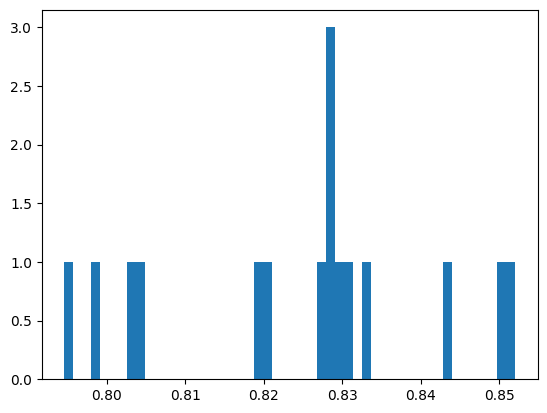

In [31]:
create_heatmap.create_heatmap(cos_sim, offs_sushi_description, offs_sushi_label, text_sushi_description, text_sushi_label, 0)